# boxplots

with Formula 1 data from https://ergast.com/mrd/db

In [1]:
%autosave 0
%load_ext autoreload
%autoreload 2

from tools import DATADIR, F1_ZIPPED
from etl.ergast import ErgastF1
from viz.plot import Plot

f1 = ErgastF1(F1_ZIPPED)
plot = Plot('dark_background')
folder = DATADIR / 'plots'

Autosave disabled


In [2]:
stops = (
    f1.pit_stops
    .join(f1.races['season id_circuit'.split()], on='id_race')
    .join(f1.circuits['circuit'], on='id_circuit')
    .join(f1.drivers['driver'], on='id_driver')
    ['season circuit driver stop duration'.split()]
    .reset_index(drop=True)
)
stops

,season,circuit,driver,stop,duration
0,2011,Albert Park Grand Prix Circuit,Jaime Alguersuari,1,26.898
1,2011,Albert Park Grand Prix Circuit,Michael Schumacher,1,25.021
2,2011,Albert Park Grand Prix Circuit,Mark Webber,1,23.426
3,2011,Albert Park Grand Prix Circuit,Fernando Alonso,1,23.251
4,2011,Albert Park Grand Prix Circuit,Felipe Massa,1,23.842
...,...,...,...,...,...
7431,2019,Yas Marina Circuit,Charles Leclerc,2,21.274
7432,2019,Yas Marina Circuit,Sebastian Vettel,2,21.858
7433,2019,Yas Marina Circuit,Daniil Kvyat,1,21.496
7434,2019,Yas Marina Circuit,Carlos Sainz,2,21.466


## stoppage time

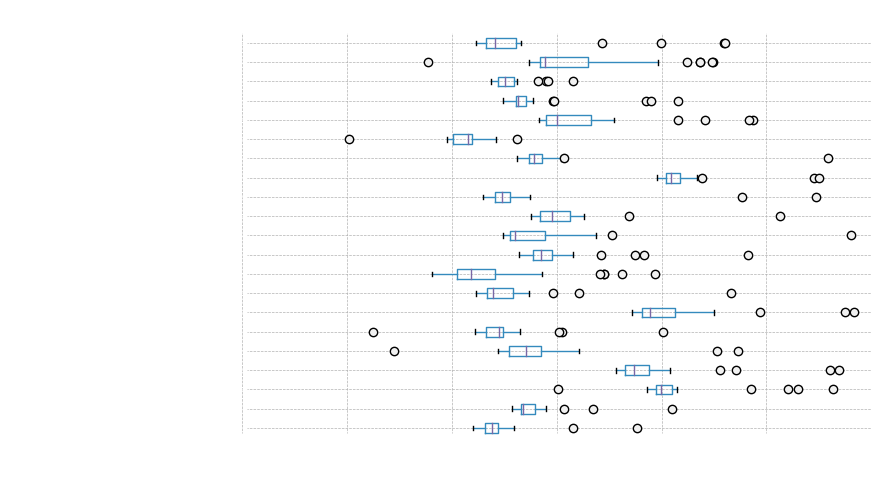

In [3]:
plot = Plot()

def alltracks(season, **kwargs):
    kwargs.setdefault('title', f"{season} pit stop durations")    
    kwargs.setdefault('xlim', (10, 40))
    kwargs.setdefault('xlabel', 'seconds')
    kwargs.setdefault('flierprops', {'markerfacecolor': '#f1f1f1'})
    
    data = stops.loc[lambda df: df['season'].eq(2019)]
    data = data.pivot(columns='circuit', values='duration')
    
    return plot.boxh(data, **kwargs)

axes = alltracks(2019)
axes.figure.savefig(folder / 'stoppage_time.png')

## stowe your roll

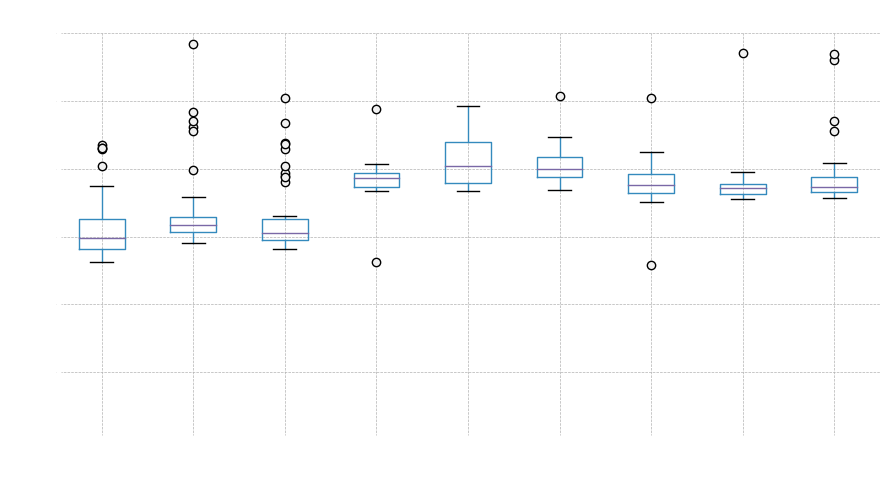

In [4]:
def onetrack(circuit, **kwargs):
    kwargs.setdefault('title', f"{circuit} pit stop duration")
    kwargs.setdefault('ylim', (10, 40))
    kwargs.setdefault('ylabel', 'seconds')
    kwargs.setdefault('flierprops', {'markerfacecolor': '#f1f1f1'})
    
    data = stops.loc[lambda df: df['circuit'].eq(circuit)]
    data = data.pivot(columns='season', values='duration')
    
    return plot.box(data, **kwargs)

axes = onetrack('Silverstone Circuit')
axes.figure.savefig(folder / 'stowe_your_roll.png')

## yas we can

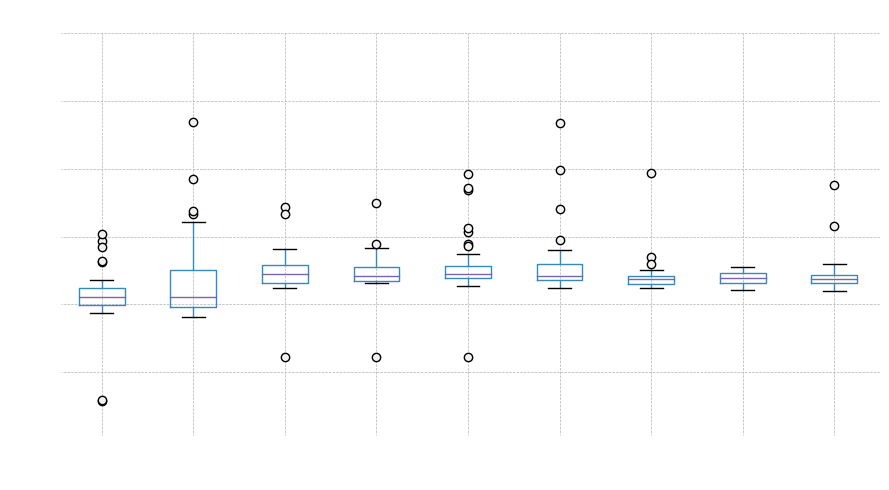

In [5]:
axes = onetrack('Yas Marina Circuit')
axes.figure.savefig(folder / 'yas_we_can.png')

## paul ralentit
Before the 2019 race, the pit lane of Circuit Paul Ricard was lengthened.

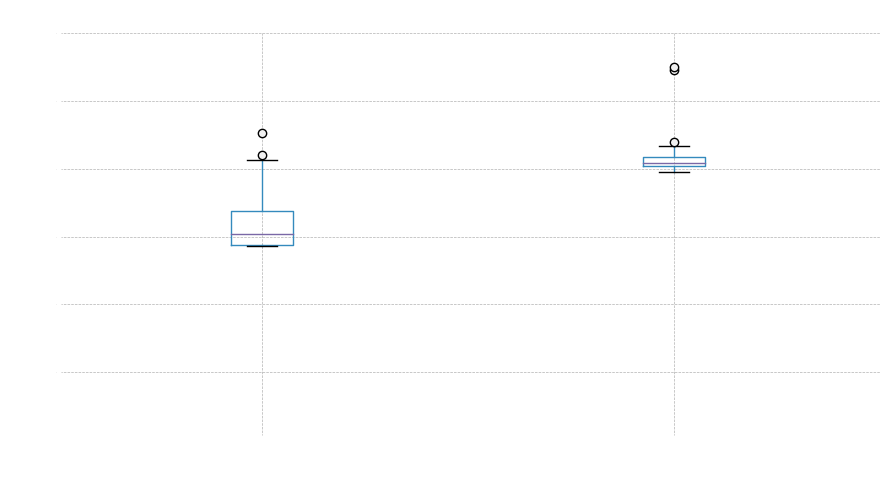

In [6]:
axes = onetrack('Circuit Paul Ricard')
axes.figure.savefig(folder / 'paul_ralentit.png')